In [1]:
import serial
from datetime import datetime

ser = serial.Serial('COM4', 9600)
filename = "dht22_data.csv"

with open(filename, "a") as f:
    print("Logging started... Press Ctrl+C to stop.")
    while True:
        try:
            line = ser.readline().decode().strip()
            timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
            f.write(f"{timestamp},{line}\n")
            print(f"{timestamp},{line}")
        except KeyboardInterrupt:
            print("Logging stopped.")
            break
        except Exception as e:
            print("Error:", e)


ModuleNotFoundError: No module named 'serial'

In [3]:
Pip install pyserial

SyntaxError: invalid syntax (1889264216.py, line 1)

In [5]:
pip install pyserial

Note: you may need to restart the kernel to use updated packages.


In [7]:
import serial
from datetime import datetime

ser = serial.Serial('COM4', 9600)  
filename = "dht22_data.csv"

with open(filename, "a") as f:
    print("Logging started... Press Ctrl+C to stop.")
    while True:
        try:
            # Read a line from serial and decode it
            line = ser.readline().decode().strip()
            timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

            # Format: 20250807161000,25.7,60.2
            f.write(f"{timestamp},{line}\n")
            print(f"{timestamp},{line}")
        except KeyboardInterrupt:
            print("Logging stopped.")
            break
        except Exception as e:
            print("Error:", e)

Logging started... Press Ctrl+C to stop.
20250807185543,20.80,43.50
20250807185545,20.90,43.60
20250807185547,20.80,43.50
20250807185549,20.80,43.50
20250807185551,20.80,43.50
20250807185553,20.90,43.50
20250807185555,20.90,43.50
20250807185557,20.80,43.40
20250807185559,20.80,43.50
20250807185601,20.80,43.50
20250807185603,20.80,43.50
20250807185605,20.80,43.50
20250807185607,20.80,43.50
20250807185609,20.80,43.40
20250807185611,20.80,43.40
20250807185613,20.80,43.50
20250807185615,20.80,43.50
20250807185617,20.80,43.40
20250807185619,20.80,43.40
20250807185621,20.80,43.40
20250807185623,20.80,43.40
20250807185625,20.80,43.40
20250807185627,20.80,43.40
20250807185629,20.80,43.40
20250807185631,20.80,43.40
20250807185633,20.80,43.40
20250807185635,20.80,43.40
20250807185637,20.80,43.40
20250807185639,20.80,43.40
20250807185641,20.80,43.00
20250807185643,20.80,43.30
20250807185645,20.80,43.00
20250807185647,20.80,43.20
20250807185649,20.80,43.20
20250807185651,20.80,43.30
20250807185653

In [9]:
import pandas as pd

df = pd.read_csv("dht22_data.csv", header=None)
df.columns = ['timestamp', 'temperature', 'humidity']
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d%H%M%S")
df.dropna(inplace=True)  # Remove missing/invalid values
df.head()


,timestamp,temperature,humidity
0,2025-08-07 18:55:43,20.8,43.5
1,2025-08-07 18:55:45,20.9,43.6
2,2025-08-07 18:55:47,20.8,43.5
3,2025-08-07 18:55:49,20.8,43.5
4,2025-08-07 18:55:51,20.8,43.5


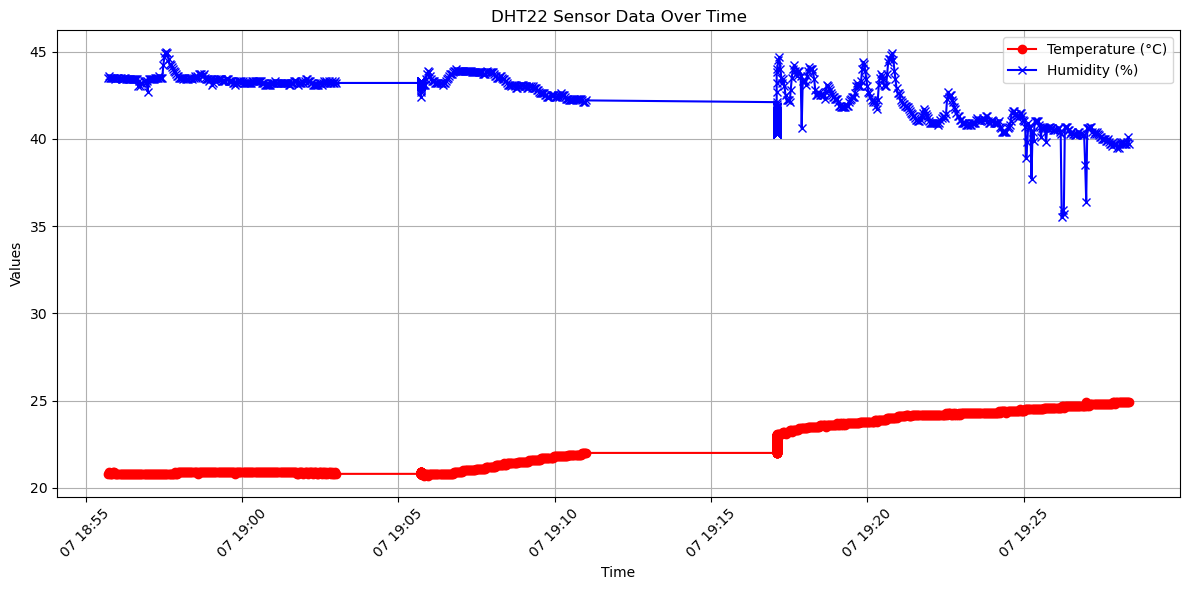

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)', color='red', marker='o')
plt.plot(df['timestamp'], df['humidity'], label='Humidity (%)', color='blue', marker='x')

plt.title("DHT22 Sensor Data Over Time")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Save graph to file
plt.savefig("graph.png")
plt.show()
